# TWITTER SENTIMENT ANALYSIS

# Importing Essential Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
import re
import nltk
from wordcloud import WordCloud,STOPWORDS
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

## Dataset Loading

In [5]:
df=pd.read_csv('D:\\Datasets\\Sentiment Analysis\\Twitter_Data.csv', sep=",")

## Exploratory Data Analysis and Processing

In [7]:
df.head() # First 5 rows for displaying

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0
3,asking his supporters prefix chowkidar their n...,1.0
4,answer who among these the most powerful world...,1.0


In [8]:
df.tail() # Last 5 rows for displaying

,clean_text,category
162975,why these 456 crores paid neerav modi not reco...,-1.0
162976,dear rss terrorist payal gawar what about modi...,-1.0
162977,did you cover her interaction forum where she ...,0.0
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [9]:
df['category'].value_counts() # For seeing how many samples are here

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [10]:
df.describe() # For getting the mathemetical description of category column

,category
count,162973.000000
mean,0.225436
std,0.781279
min,-1.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
df.info() # For getting the information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB


In [12]:
df[['clean_text']]

,clean_text
0,when modi promised “minimum government maximum...
1,talk all the nonsense and continue all the dra...
2,what did just say vote for modi welcome bjp t...
3,asking his supporters prefix chowkidar their n...
4,answer who among these the most powerful world...
...,...
162975,why these 456 crores paid neerav modi not reco...
162976,dear rss terrorist payal gawar what about modi...
162977,did you cover her interaction forum where she ...
162978,there big project came into india modi dream p...


In [13]:
df.shape # For seeing the numbers of rows and columns

(162980, 2)

In [14]:
df.isnull().sum() # Seeing the null values

clean_text    4
category      7
dtype: int64

### Handling the missing values

In [16]:
df['clean_text'].fillna('calm waters wheres the modi wave', inplace=True)

C:\Users\Mizanur Rahman\AppData\Local\Temp\ipykernel_8868\3358296128.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_text'].fillna('calm waters wheres the modi wave', inplace=True)


In [17]:
df.category=df.category.fillna(df.category.median())

In [18]:
df.isnull().sum() # Seeing the null values again and no null value is here

clean_text    0
category      0
dtype: int64

In [19]:
positive_review=list(df[df['category']==1]['clean_text'])
negative_review=list(df[df['category']==-1]['clean_text'])
neutral_review=list(df[df['category']==-0]['clean_text'])

In [20]:
def create_cloud(string, title=None):
    cloud = WordCloud(height=1080, 
                      width=1920, 
                      background_color='white', 
                      min_font_size=10, 
                      stopwords=STOPWORDS).generate(string)
    plt.figure(figsize=(10,20))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis("off")
    if title:
        plt.title(title, fontdict={'fontsize':24})
    plt.show()

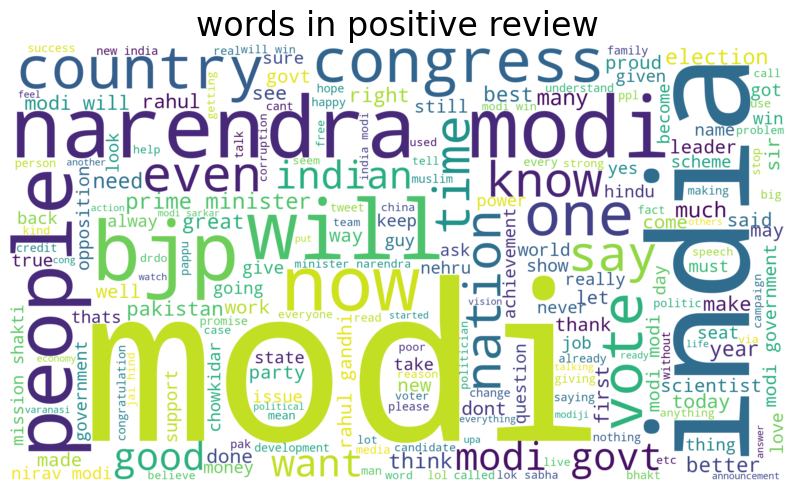

In [21]:
create_cloud(' '.join(positive_review).lower(),'words in positive review')

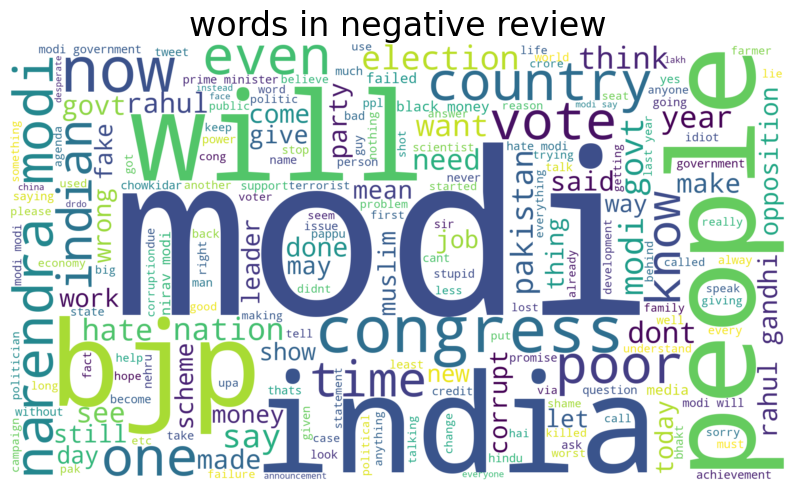

In [54]:
create_cloud(' '.join(negative_review).lower(),'words in negative review')

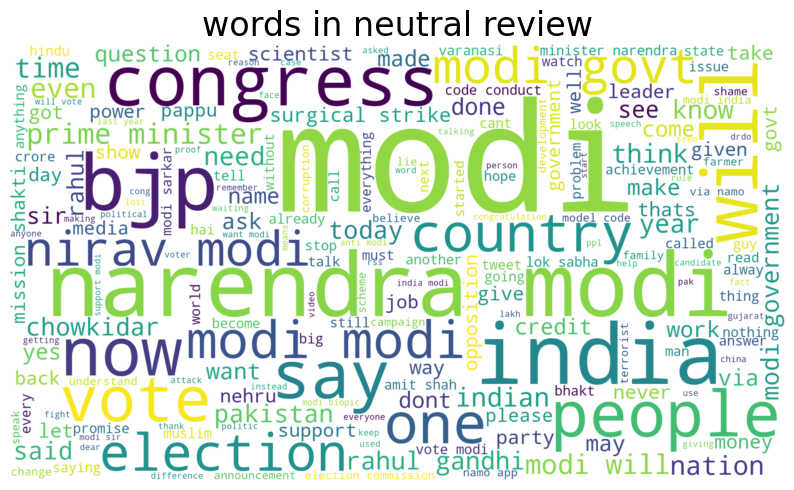

In [56]:
create_cloud(' '.join(neutral_review).lower(),'words in neutral review')

In [22]:
def text_processing(data):
    from bs4 import BeautifulSoup # Removes all html tag when we take data from google or other sources
    import re   # re means regets which is comparatively faster
    def decontracted(phrase):
        # specific
        phrase= re.sub(r'<br /><br />',' ',phrase) # re helps to find pattern
        phrase = re.sub(r"won't", "will not", phrase)
        phrase = re.sub(r"can\'t", "can not", phrase)

        # general
        phrase = re.sub(r"n\'t", " not", phrase)
        phrase = re.sub(r"\'re", " are", phrase)
        phrase = re.sub(r"\'s", " is", phrase)
        phrase = re.sub(r"\'d", " would", phrase)
        phrase = re.sub(r"\'ll", " will", phrase)
        phrase = re.sub(r"\'t", " not", phrase)
        phrase = re.sub(r"\'ve", " have", phrase)
        phrase = re.sub(r"\'m", " am", phrase)
        phrase = re.sub(r'"', " ", phrase)
        return phrase
    stopwords=set(STOPWORDS)

    # Combining all the above stundents 
    from tqdm import tqdm  # tqdm basically progress means how much time needs to be completed
    preprocessed_reviews = []
    # tqdm is for printing the status bar
    for sentance in data['clean_text'].values:
        sentance = re.sub(r"http\\S+", "", sentance)
        sentance = decontracted(sentance)
        sentance = re.sub("\\S*\\d\\S*", "", sentance).strip()
        sentance = ' '.join(e.lower() for e in sentance.split() if e not in stopwords)
        preprocessed_reviews.append(sentance.strip())
        
        # We can use 2 type lemmatization and stemming
    
    from nltk.stem import PorterStemmer

    porter = PorterStemmer()
    list2=[]
    for  sentence in preprocessed_reviews:
      list1=[]
      for words in sentence.split():
        list1.append(porter.stem(words)) # Gives the root words like making--> make, cleaning-->clean

      list2.append(' '.join(list1)) 
    return(list2)
# Lemmatization is the two words has same meaning like better--> good, went --> go

In [23]:
x=text_processing(df)

In [24]:
df['cleaned_review']=x

In [25]:
df.head()

,clean_text,category,cleaned_review
0,when modi promised “minimum government maximum...,-1.0,modi promis “minimum govern maximum governance...
1,talk all the nonsense and continue all the dra...,0.0,talk nonsens continu drama will vote modi
2,what did just say vote for modi welcome bjp t...,1.0,say vote modi welcom bjp told rahul main campa...
3,asking his supporters prefix chowkidar their n...,1.0,ask support prefix chowkidar name modi great s...
4,answer who among these the most powerful world...,1.0,answer among power world leader today trump pu...


In [46]:
df_x=df['clean_text']
df_y=df['category']

In [48]:
df_x.shape

(162980,)

In [50]:
df_y.shape

(162980,)

In [58]:
df.columns

Index(['clean_text', 'category', 'cleaned_review'], dtype='object')

## Data Splitting

In [67]:
df_x=df['cleaned_review']
df_y=df['category']

In [73]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=0)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((130384,), (32596,), (130384,), (32596,))

In [85]:
y_train.value_counts()

category
 1.0    57691
 0.0    44244
-1.0    28449
Name: count, dtype: int64

In [87]:
y_test.value_counts()

category
 1.0    14559
 0.0    10976
-1.0     7061
Name: count, dtype: int64

In [89]:
X_train

130855    debat scheme await implement decad implement m...
79901       actual modi need know differ bjp prem desh prem
19315     matter fact modi never said give money figur l...
99994     still intent promis noth fear wat will happen ...
83288                                          jay bjp modi
                                ...                        
97639     economist kalmadi chidambaram karti chidambara...
95939     rahul bole baccha modi bole raksha quit hypocr...
152315                           ye modi stood differ place
117952    mani still think came wud agn appli mani thing...
43567                      good news nation modi lost elect
Name: cleaned_review, Length: 130384, dtype: object

In [91]:
vectorizer = TfidfVectorizer(max_features = 10,ngram_range=(1,2)) # for increasing diagram we use bi-gram or tri-gram and top 10 features will be showed
X_train_bow = vectorizer.fit_transform(X_train) # finds the unique words
X_test_bow = vectorizer.transform(X_test)

In [93]:
X_train_bow.shape,X_test_bow.shape

((130384, 10), (32596, 10))

In [95]:
X_test_bow.toarray()[0].shape

(10,)

In [97]:
list(X_test_bow.toarray()[0])

[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [101]:
from sklearn.neighbors import KNeighborsClassifier

list_train_acc=[]
list_test_acc = []
for i in range(10,30):
    print('n neighbor',i)
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(X_train_bow, y_train)

    from sklearn.metrics import accuracy_score
    y_train_pred  = neigh.predict(X_train_bow)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print('train accuracy',train_accuracy)
    list_train_acc.append(train_accuracy)

    y_test_pred  = neigh.predict(X_test_bow)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print('test accuracy',test_accuracy)
    list_test_acc.append(test_accuracy)
    print('-'*50)
    print()

n neighbor 10
train accuracy 0.40905325806847465
test accuracy 0.40621548656276846
--------------------------------------------------

n neighbor 11
train accuracy 0.410916983678979
test accuracy 0.4088538470978034
--------------------------------------------------

n neighbor 12
train accuracy 0.41501257823045773
test accuracy 0.41566449871149835
--------------------------------------------------

n neighbor 13
train accuracy 0.4147594796907596
test accuracy 0.4146214259418334
--------------------------------------------------

n neighbor 14
train accuracy 0.4158332310712971
test accuracy 0.4169530003681433
--------------------------------------------------

n neighbor 15
train accuracy 0.414107559209719
test accuracy 0.41425328261136335
--------------------------------------------------

n neighbor 16
train accuracy 0.4134096208123696
test accuracy 0.4126886734568659
--------------------------------------------------

n neighbor 17
train accuracy 0.424730028224322
test accuracy 0.425

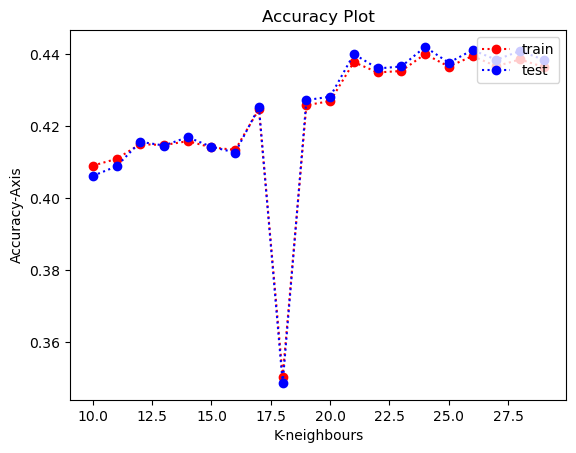

In [103]:
plt.plot(list(range(10,30)),list_train_acc, color = 'r',linestyle = ":",marker = 'o')
plt.plot(list(range(10,30)),list_test_acc, color = 'b',linestyle = ":",marker = 'o')
plt.title("Accuracy Plot")
plt.ylabel("Accuracy-Axis")
plt.xlabel("K-neighbours")
plt.legend(['train','test'],loc='upper right')
plt.show()

In [105]:
y_test_pred  = neigh.predict([X_test_bow.toarray()[0]])
y_test_pred

array([1.])

In [107]:
y_test_pred  = neigh.predict_proba([X_test_bow.toarray()[0]])
y_test_pred

array([[0.13793103, 0.20689655, 0.65517241]])